In [112]:
import os
os.chdir(r"c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination")
import warnings

import gensim
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/cleaned_data/bulletins_w_labels_and_content.csv", dtype={'ID': object})  
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names,Label 60/40,Numeric label 60/40,Label 70/30,Numeric label 70/30,Cleaned text,Text
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206 041814.txt,M,2,N,0,director class code open date annual salary du...,311 DIRECTOR Class Code: 9206 Open Date:...
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223 071318.txt,W,1,W,1,accounting clerk class code open date exam ope...,ACCOUNTING CLERK Class Code: 1223 Open ...
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260 120216.txt,M,2,M,2,airport manager class code open date exam open...,AIRPORT MANAGER Class Code: 7260 Open D...
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227 091616.txt,M,2,M,2,airport police lieutenant class code open date...,AIRPORT POLICE LIEUTENANT ...
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400 050214.txt,M,2,N,0,aquarist class code open date annual salary ca...,AQUARIST Class Code: 2400 Open Date: 05...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840 1...,M,2,N,0,wastewater treatment laboratory manager class ...,WASTEWATER TREATMENT LABORATORY MANAGER Class...
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 120718.txt,M,2,M,2,wastewater treatment operator class code open ...,WASTEWATER TREATMENT OPERATOR Class Code: ...
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857 072514 rev073114.txt,N,0,N,0,water microbiologist class code open date revi...,WATER MICROBIOLOGIST Class Code: 7857...
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912 120817.txt,M,2,M,2,water utility worker class code open date exam...,WATER UTILITY WORKER Class Code: 3912 Op...


In [3]:
X = df["Cleaned text"]

In [4]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

count_vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2))
count_vectorizer_trigrams = CountVectorizer(ngram_range=(3, 3))

tfidf_vectorizer_bigrams = TfidfVectorizer(ngram_range=(2, 2))
tfidf_vectorizer_trigrams = TfidfVectorizer(ngram_range=(3, 3))

In [5]:
X_count = count_vectorizer.fit_transform(X).toarray()
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()

X_count_bigrams = count_vectorizer_bigrams.fit_transform(X).toarray()
X_count_trigrams = count_vectorizer_trigrams.fit_transform(X).toarray()

X_tfidf_bigrams = tfidf_vectorizer_bigrams.fit_transform(X).toarray()
X_tfidf_trigrams = tfidf_vectorizer_trigrams.fit_transform(X).toarray()

In [6]:
y_70_30 = df["Numeric label 70/30"]
y_60_40 = df["Numeric label 60/40"]

In [8]:
X = X_count
y = y_70_30

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
pred = clf.predict(X_test)

acc = accuracy_score(pred, y_test)
recall = recall_score(pred, y_test, average="weighted")
precision = precision_score(pred, y_test, average="weighted")
f1 = f1_score(pred, y_test, average="weighted")

In [10]:
print(f"Accuracy: {round(acc, 3)}, F1: {round(f1, 3)}, Recall: {round(recall, 3)}, Precision: {round(precision, 3)}")

Accuracy: 0.689, F1: 0.676, Recall: 0.689, Precision: 0.665


In [31]:
trials_dictionaries = []

In [27]:
def objective(trial):
    X = X_count
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [28]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 13:47:35,176] A new study created in memory with name: no-name-808fd986-4a2d-4280-8d6f-398bf2fc8908
[I 2023-01-05 13:47:35,190] Trial 0 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 10}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 13:47:35,204] Trial 1 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 11}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 13:47:35,216] Trial 2 finished with value: 0.7333333333333333 and parameters: {'n_neighb': 9}. Best is trial 2 with value: 0.7333333333333333.
[I 2023-01-05 13:47:35,229] Trial 3 finished with value: 0.6888888888888889 and parameters: {'n_neighb': 3}. Best is trial 2 with value: 0.7333333333333333.
[I 2023-01-05 13:47:35,243] Trial 4 finished with value: 0.6888888888888889 and parameters: {'n_neighb': 3}. Best is trial 2 with value: 0.7333333333333333.
[I 2023-01-05 13:47:35,257] Trial 5 finished with value: 0.6888888888888889 and parameters: {'n_nei

In [29]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_count
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [30]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
trials_dict = {
    "X": "X_count", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params,
    }

trials_dictionaries.append(trials_dict)
print("X_count, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_count, y_70_30
Score: 0.733
Best parameters: {'n_neighb': 9}
F1: 0.779
Recall: 0.733
Precision: 0.854


In [40]:
def objective(trial):
    X = X_count
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [41]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 13:52:13,767] A new study created in memory with name: no-name-3bb0c7c4-2d7a-464d-92ae-08ab0ec2efc5
[I 2023-01-05 13:52:13,780] Trial 0 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 3}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 13:52:13,793] Trial 1 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 9}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 13:52:13,807] Trial 2 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 3}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 13:52:13,822] Trial 3 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 10}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 13:52:13,835] Trial 4 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 11}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 13:52:13,848] Trial 5 finished with value: 0.7333333333333333 and parameters: {'n_nei

In [42]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_count
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [43]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
trials_dict = {
    "X": "X_count", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params,
    }

trials_dictionaries.append(trials_dict)
print("X_count, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_count, y_60_40
Score: 0.733
Best parameters: {'n_neighb': 6}
F1: 0.698
Recall: 0.667
Precision: 0.733


In [45]:
def objective(trial):
    X = X_tfidf
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [46]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 13:56:12,954] A new study created in memory with name: no-name-ec60a20d-3546-47bd-933e-c9931069cf8d
[I 2023-01-05 13:56:13,075] Trial 0 finished with value: 0.8 and parameters: {'n_neighb': 3}. Best is trial 0 with value: 0.8.
[I 2023-01-05 13:56:13,092] Trial 1 finished with value: 0.8222222222222222 and parameters: {'n_neighb': 8}. Best is trial 1 with value: 0.8222222222222222.
[I 2023-01-05 13:56:13,105] Trial 2 finished with value: 0.8444444444444444 and parameters: {'n_neighb': 6}. Best is trial 2 with value: 0.8444444444444444.
[I 2023-01-05 13:56:13,118] Trial 3 finished with value: 0.8222222222222222 and parameters: {'n_neighb': 5}. Best is trial 2 with value: 0.8444444444444444.
[I 2023-01-05 13:56:13,132] Trial 4 finished with value: 0.8222222222222222 and parameters: {'n_neighb': 5}. Best is trial 2 with value: 0.8444444444444444.
[I 2023-01-05 13:56:13,145] Trial 5 finished with value: 0.8222222222222222 and parameters: {'n_neighb': 10}. Best is trial 2 with 

In [47]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_tfidf
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [48]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
trials_dict = {
    "X": "X_tfidf", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params,
    }

trials_dictionaries.append(trials_dict)
print("X_tfidf, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_tfidf, y_70_30
Score: 0.867
Best parameters: {'n_neighb': 7}
F1: 0.902
Recall: 0.867
Precision: 0.948


In [50]:
def objective(trial):
    X = X_tfidf
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [51]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 13:57:30,956] A new study created in memory with name: no-name-69d52632-7b09-4670-afb6-92f4548c5c1f
[I 2023-01-05 13:57:30,971] Trial 0 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 10}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 13:57:30,985] Trial 1 finished with value: 0.7777777777777778 and parameters: {'n_neighb': 5}. Best is trial 1 with value: 0.7777777777777778.
[I 2023-01-05 13:57:30,999] Trial 2 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 10}. Best is trial 1 with value: 0.7777777777777778.
[I 2023-01-05 13:57:31,015] Trial 3 finished with value: 0.7777777777777778 and parameters: {'n_neighb': 7}. Best is trial 1 with value: 0.7777777777777778.
[I 2023-01-05 13:57:31,031] Trial 4 finished with value: 0.7333333333333333 and parameters: {'n_neighb': 6}. Best is trial 1 with value: 0.7777777777777778.
[I 2023-01-05 13:57:31,047] Trial 5 finished with value: 0.7333333333333333 and parameters: {'n_nei

In [52]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_tfidf
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [53]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [54]:
trials_dict = {
    "X": "X_tfidf", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_tfidf, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_tfidf, y_60_40
Score: 0.778
Best parameters: {'n_neighb': 5}
F1: 0.822
Recall: 0.778
Precision: 0.888


In [55]:
def objective(trial):
    X = X_count_bigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [56]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 13:58:30,006] A new study created in memory with name: no-name-2cbb7c8e-61c3-48d5-a6e2-0d9a054021d3
[I 2023-01-05 13:58:30,068] Trial 0 finished with value: 0.6444444444444445 and parameters: {'n_neighb': 8}. Best is trial 0 with value: 0.6444444444444445.
[I 2023-01-05 13:58:30,128] Trial 1 finished with value: 0.4444444444444444 and parameters: {'n_neighb': 4}. Best is trial 0 with value: 0.6444444444444445.
[I 2023-01-05 13:58:30,178] Trial 2 finished with value: 0.5777777777777777 and parameters: {'n_neighb': 6}. Best is trial 0 with value: 0.6444444444444445.
[I 2023-01-05 13:58:30,233] Trial 3 finished with value: 0.5111111111111111 and parameters: {'n_neighb': 3}. Best is trial 0 with value: 0.6444444444444445.
[I 2023-01-05 13:58:30,292] Trial 4 finished with value: 0.6444444444444445 and parameters: {'n_neighb': 11}. Best is trial 0 with value: 0.6444444444444445.
[I 2023-01-05 13:58:30,345] Trial 5 finished with value: 0.5777777777777777 and parameters: {'n_neig

In [57]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_count_bigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [58]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
trials_dict = {
    "X": "X_count_bigrams", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_count_bigrams, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_count_bigrams, y_70_30
Score: 0.689
Best parameters: {'n_neighb': 9}
F1: 0.746
Recall: 0.689
Precision: 0.838


In [60]:
def objective(trial):
    X = X_count_bigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [61]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 13:59:33,016] A new study created in memory with name: no-name-87066e7c-b699-488b-8915-f781091ebfd3
[I 2023-01-05 13:59:33,071] Trial 0 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 11}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 13:59:33,131] Trial 1 finished with value: 0.5333333333333333 and parameters: {'n_neighb': 4}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 13:59:33,186] Trial 2 finished with value: 0.6888888888888889 and parameters: {'n_neighb': 9}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 13:59:33,242] Trial 3 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 6}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 13:59:33,296] Trial 4 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 8}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 13:59:33,356] Trial 5 finished with value: 0.7111111111111111 and parameters: {'n_neig

In [62]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_count_bigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [63]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [64]:
trials_dict = {
    "X": "X_count_bigrams", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_count_bigrams, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_count_bigrams, y_60_40
Score: 0.733
Best parameters: {'n_neighb': 5}
F1: 0.776
Recall: 0.733
Precision: 0.858


In [65]:
def objective(trial):
    X = X_count_trigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [66]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 14:00:19,731] A new study created in memory with name: no-name-2d8a78aa-3561-4c27-b0ac-2b587d8ed332
[I 2023-01-05 14:00:19,885] Trial 0 finished with value: 0.4444444444444444 and parameters: {'n_neighb': 4}. Best is trial 0 with value: 0.4444444444444444.
[I 2023-01-05 14:00:19,979] Trial 1 finished with value: 0.6666666666666666 and parameters: {'n_neighb': 8}. Best is trial 1 with value: 0.6666666666666666.
[I 2023-01-05 14:00:20,075] Trial 2 finished with value: 0.6222222222222222 and parameters: {'n_neighb': 7}. Best is trial 1 with value: 0.6666666666666666.
[I 2023-01-05 14:00:20,154] Trial 3 finished with value: 0.6666666666666666 and parameters: {'n_neighb': 8}. Best is trial 1 with value: 0.6666666666666666.
[I 2023-01-05 14:00:20,235] Trial 4 finished with value: 0.6444444444444445 and parameters: {'n_neighb': 9}. Best is trial 1 with value: 0.6666666666666666.
[I 2023-01-05 14:00:20,319] Trial 5 finished with value: 0.6222222222222222 and parameters: {'n_neigh

In [67]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_count_trigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [68]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [69]:
trials_dict = {
    "X": "X_count_trigrams", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_count_trigrams, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_count_trigrams, y_70_30
Score: 0.667
Best parameters: {'n_neighb': 8}
F1: 0.677
Recall: 0.667
Precision: 0.692


In [70]:
def objective(trial):
    X = X_count_trigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [71]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 14:01:19,084] A new study created in memory with name: no-name-890bc79e-bd81-4f34-a13f-93a9bc60337a
[I 2023-01-05 14:01:19,169] Trial 0 finished with value: 0.5777777777777777 and parameters: {'n_neighb': 4}. Best is trial 0 with value: 0.5777777777777777.
[I 2023-01-05 14:01:19,268] Trial 1 finished with value: 0.5777777777777777 and parameters: {'n_neighb': 4}. Best is trial 0 with value: 0.5777777777777777.
[I 2023-01-05 14:01:19,350] Trial 2 finished with value: 0.6666666666666666 and parameters: {'n_neighb': 6}. Best is trial 2 with value: 0.6666666666666666.
[I 2023-01-05 14:01:19,426] Trial 3 finished with value: 0.5777777777777777 and parameters: {'n_neighb': 4}. Best is trial 2 with value: 0.6666666666666666.
[I 2023-01-05 14:01:19,503] Trial 4 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 9}. Best is trial 4 with value: 0.7111111111111111.
[I 2023-01-05 14:01:19,582] Trial 5 finished with value: 0.7111111111111111 and parameters: {'n_neigh

In [72]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_count_trigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [73]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [74]:
trials_dict = {
    "X": "X_count_trigrams", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_count_trigrams, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_count_trigrams, y_60_40
Score: 0.756
Best parameters: {'n_neighb': 10}
F1: 0.827
Recall: 0.756
Precision: 0.962


In [78]:
def objective(trial):
    X = X_tfidf_bigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [79]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 14:05:41,295] A new study created in memory with name: no-name-c9acb48d-c36c-4a04-8179-b60b9b4e1fa0
[I 2023-01-05 14:05:41,359] Trial 0 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 4}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 14:05:41,406] Trial 1 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 10}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 14:05:41,456] Trial 2 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 3}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 14:05:41,503] Trial 3 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 7}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 14:05:41,553] Trial 4 finished with value: 0.7333333333333333 and parameters: {'n_neighb': 11}. Best is trial 4 with value: 0.7333333333333333.
[I 2023-01-05 14:05:41,599] Trial 5 finished with value: 0.7333333333333333 and parameters: {'n_nei

In [80]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_tfidf_bigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [81]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
trials_dict = {
    "X": "X_tfidf_bigrams", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_tfidf_bigrams, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_tfidf_bigrams, y_70_30
Score: 0.733
Best parameters: {'n_neighb': 11}
F1: 0.759
Recall: 0.733
Precision: 0.793


In [83]:
def objective(trial):
    X = X_tfidf_bigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [84]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 14:07:04,829] A new study created in memory with name: no-name-3a4a7d31-a1ac-41b1-b85b-e946b80fd358
[I 2023-01-05 14:07:04,886] Trial 0 finished with value: 0.7333333333333333 and parameters: {'n_neighb': 11}. Best is trial 0 with value: 0.7333333333333333.
[I 2023-01-05 14:07:04,937] Trial 1 finished with value: 0.7333333333333333 and parameters: {'n_neighb': 8}. Best is trial 0 with value: 0.7333333333333333.
[I 2023-01-05 14:07:04,982] Trial 2 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 4}. Best is trial 0 with value: 0.7333333333333333.
[I 2023-01-05 14:07:05,023] Trial 3 finished with value: 0.7333333333333333 and parameters: {'n_neighb': 10}. Best is trial 0 with value: 0.7333333333333333.
[I 2023-01-05 14:07:05,069] Trial 4 finished with value: 0.6888888888888889 and parameters: {'n_neighb': 6}. Best is trial 0 with value: 0.7333333333333333.
[I 2023-01-05 14:07:05,116] Trial 5 finished with value: 0.7333333333333333 and parameters: {'n_nei

In [85]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_tfidf_bigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [86]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [87]:
trials_dict = {
    "X": "X_tfidf_bigrams", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_tfidf_bigrams, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_tfidf_bigrams, y_60_40
Score: 0.756
Best parameters: {'n_neighb': 5}
F1: 0.815
Recall: 0.756
Precision: 0.906


In [88]:
def objective(trial):
    X = X_tfidf_trigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [89]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 14:08:03,016] A new study created in memory with name: no-name-1b0aba10-c695-4298-aa65-538f56b11ede
[I 2023-01-05 14:08:03,086] Trial 0 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 7}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 14:08:03,157] Trial 1 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 7}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 14:08:03,222] Trial 2 finished with value: 0.6666666666666666 and parameters: {'n_neighb': 4}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 14:08:03,289] Trial 3 finished with value: 0.6666666666666666 and parameters: {'n_neighb': 8}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 14:08:03,345] Trial 4 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 7}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 14:08:03,410] Trial 5 finished with value: 0.7333333333333333 and parameters: {'n_neigh

In [90]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_tfidf_trigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [91]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
trials_dict = {
    "X": "X_tfidf_trigrams", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_tfidf_trigrams, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_tfidf_trigrams, y_70_30
Score: 0.733
Best parameters: {'n_neighb': 9}
F1: 0.763
Recall: 0.733
Precision: 0.797


In [93]:
def objective(trial):
    X = X_tfidf_trigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [94]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 14:08:56,253] A new study created in memory with name: no-name-95237e45-8a96-47de-a231-e5bdc4e644ce
[I 2023-01-05 14:08:56,342] Trial 0 finished with value: 0.6888888888888889 and parameters: {'n_neighb': 7}. Best is trial 0 with value: 0.6888888888888889.
[I 2023-01-05 14:08:56,404] Trial 1 finished with value: 0.6666666666666666 and parameters: {'n_neighb': 4}. Best is trial 0 with value: 0.6888888888888889.
[I 2023-01-05 14:08:56,471] Trial 2 finished with value: 0.6666666666666666 and parameters: {'n_neighb': 4}. Best is trial 0 with value: 0.6888888888888889.
[I 2023-01-05 14:08:56,537] Trial 3 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 6}. Best is trial 3 with value: 0.7111111111111111.
[I 2023-01-05 14:08:56,607] Trial 4 finished with value: 0.7111111111111111 and parameters: {'n_neighb': 10}. Best is trial 3 with value: 0.7111111111111111.
[I 2023-01-05 14:08:56,686] Trial 5 finished with value: 0.6666666666666666 and parameters: {'n_neig

In [95]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_tfidf_trigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [96]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [97]:
trials_dict = {
    "X": "X_tfidf_trigrams", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_tfidf_trigrams, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_tfidf_trigrams, y_60_40
Score: 0.756
Best parameters: {'n_neighb': 3}
F1: 0.796
Recall: 0.756
Precision: 0.857


In [173]:
trials_df = pd.DataFrame(trials_dictionaries)
trials_df

,X,y,Best score,F1,Recall,Precision,Best parameters
0,X_count,y_70_30,0.733,0.779394,0.733333,0.854406,{'n_neighb': 9}
1,X_count,y_60_40,0.733,0.698230,0.666667,0.732950,{'n_neighb': 6}
2,X_tfidf,y_70_30,0.867,0.901587,0.866667,0.948148,{'n_neighb': 7}
3,X_tfidf,y_60_40,0.778,0.822344,0.777778,0.887831,{'n_neighb': 5}
4,X_count_bigrams,y_70_30,0.689,0.746094,0.688889,0.838059,{'n_neighb': 9}
5,X_count_bigrams,y_60_40,0.733,0.776296,0.733333,0.857672,{'n_neighb': 5}
6,X_count_trigrams,y_70_30,0.667,0.677037,0.666667,0.692337,{'n_neighb': 8}
7,X_count_trigrams,y_60_40,0.756,0.827312,0.755556,0.962434,{'n_neighb': 10}
8,X_tfidf_bigrams,y_70_30,0.733,0.758730,0.733333,0.792593,{'n_neighb': 11}
9,X_tfidf_bigrams,y_60_40,0.756,0.814815,0.755556,0.906349,{'n_neighb': 5}


In [174]:
trials_df = pd.concat([trials_df.drop(["Best parameters"], axis=1), trials_df["Best parameters"].apply(pd.Series)], axis=1)
trials_df

,X,y,Best score,F1,Recall,Precision,n_neighb
0,X_count,y_70_30,0.733,0.779394,0.733333,0.854406,9
1,X_count,y_60_40,0.733,0.698230,0.666667,0.732950,6
2,X_tfidf,y_70_30,0.867,0.901587,0.866667,0.948148,7
3,X_tfidf,y_60_40,0.778,0.822344,0.777778,0.887831,5
4,X_count_bigrams,y_70_30,0.689,0.746094,0.688889,0.838059,9
5,X_count_bigrams,y_60_40,0.733,0.776296,0.733333,0.857672,5
6,X_count_trigrams,y_70_30,0.667,0.677037,0.666667,0.692337,8
7,X_count_trigrams,y_60_40,0.756,0.827312,0.755556,0.962434,10
8,X_tfidf_bigrams,y_70_30,0.733,0.758730,0.733333,0.792593,11
9,X_tfidf_bigrams,y_60_40,0.756,0.814815,0.755556,0.906349,5


In [175]:
trials_df = trials_df.sort_values(by=["Best score"], ascending=False, ignore_index=True)
trials_df

,X,y,Best score,F1,Recall,Precision,n_neighb
0,X_tfidf,y_70_30,0.867,0.901587,0.866667,0.948148,7
1,X_doc_vectors,y_70_30,0.867,0.898571,0.866667,0.958621,6
2,X_scaled_doc_vectors,y_70_30,0.822,0.858348,0.822222,0.898467,1
3,X_doc_vectors,y_60_40,0.800,0.832392,0.800000,0.870690,3
4,X_tfidf,y_60_40,0.778,0.822344,0.777778,0.887831,5
5,X_scaled_doc_vectors,y_60_40,0.778,0.802004,0.777778,0.836376,1
6,X_count_trigrams,y_60_40,0.756,0.827312,0.755556,0.962434,10
7,X_tfidf_bigrams,y_60_40,0.756,0.814815,0.755556,0.906349,5
8,X_tfidf_trigrams,y_60_40,0.756,0.796085,0.755556,0.857209,3
9,X_count,y_70_30,0.733,0.779394,0.733333,0.854406,9


In [176]:
trials_df.rename(columns = {"n_neighb": "No of neighbors"}, inplace=True)

In [177]:
f1_s = trials_df["F1"]
f1_s =[round(f1, 3) for f1 in f1_s]
trials_df["F1"] = f1_s

recalls = trials_df["Recall"]
recalls =[round(r, 3) for r in recalls]
trials_df["Recall"] = recalls

precisions = trials_df["Precision"]
precisions =[round(p, 3) for p in precisions]
trials_df["Precision"] = precisions

In [178]:
trials_df

,X,y,Best score,F1,Recall,Precision,No of neighbors
0,X_tfidf,y_70_30,0.867,0.902,0.867,0.948,7
1,X_doc_vectors,y_70_30,0.867,0.899,0.867,0.959,6
2,X_scaled_doc_vectors,y_70_30,0.822,0.858,0.822,0.898,1
3,X_doc_vectors,y_60_40,0.800,0.832,0.800,0.871,3
4,X_tfidf,y_60_40,0.778,0.822,0.778,0.888,5
5,X_scaled_doc_vectors,y_60_40,0.778,0.802,0.778,0.836,1
6,X_count_trigrams,y_60_40,0.756,0.827,0.756,0.962,10
7,X_tfidf_bigrams,y_60_40,0.756,0.815,0.756,0.906,5
8,X_tfidf_trigrams,y_60_40,0.756,0.796,0.756,0.857,3
9,X_count,y_70_30,0.733,0.779,0.733,0.854,9


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_70_30, random_state=1)

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=pred, labels=clf.classes_)

In [105]:
acc = accuracy_score(pred, y_test)
recall = recall_score(pred, y_test, average="weighted")
precision = precision_score(pred, y_test, average="weighted")
f1 = f1_score(pred, y_test, average="weighted")

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
print(f"Score: {round(acc, 3)}")
print(f"F1: {round(f1, 3)}")
print(f"Recall: {round(recall, 3)}")
print(f"Precision: {round(precision, 3)}")

Score: 0.867
F1: 0.902
Recall: 0.867
Precision: 0.948


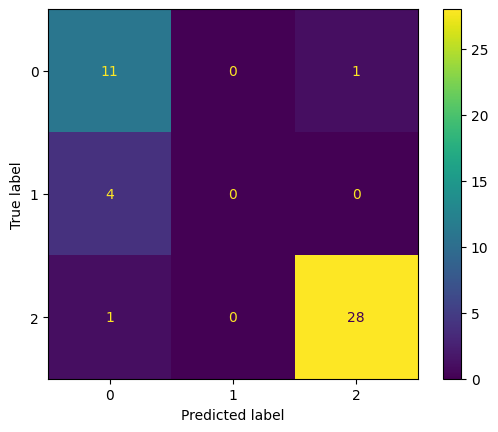

In [108]:
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
plot.plot()
plt.show()

In [110]:
corpus = list(df["Cleaned text"])

In [113]:
google_model = gensim.models.KeyedVectors.load_word2vec_format("c:/Users/britt/Downloads/GoogleNews-vectors-negative300.bin.gz", binary=True)

In [114]:
tfidf_vectorizer.fit_transform(corpus)

<177x3835 sparse matrix of type '<class 'numpy.float64'>'
	with 68003 stored elements in Compressed Sparse Row format>

In [115]:
vocabulary = tfidf_vectorizer.get_feature_names_out()
documents_embeddings = []
documents_scaled_embeddings = []
for doc in corpus:
    word_embeddings = []
    scaled_embeddings  = []
    doc_list = doc.split()
    for word in doc_list:
        if word in google_model.key_to_index.keys():
            embedding = google_model[word]
            word_embeddings.append(embedding)
            index = np.where(vocabulary == word)[0]
            try:
                scaled_embeddings.append(embedding * tfidf_vectorizer.idf_[index])
            except ValueError:
                pass
    documents_embeddings.append(word_embeddings)
    documents_scaled_embeddings.append(scaled_embeddings)

In [116]:
df["Embeddings"] = documents_embeddings
df["Scaled embeddings"] = documents_scaled_embeddings
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names,Label 60/40,Numeric label 60/40,Label 70/30,Numeric label 70/30,Cleaned text,Text,Embeddings,Scaled embeddings
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206 041814.txt,M,2,N,0,director class code open date annual salary du...,311 DIRECTOR Class Code: 9206 Open Date:...,"[[-0.040283203, -0.32226562, 0.040527344, -0.1...","[[-0.14271235996378817, -1.1416988797103054, 0..."
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223 071318.txt,W,1,W,1,accounting clerk class code open date exam ope...,ACCOUNTING CLERK Class Code: 1223 Open ...,"[[-0.020141602, 0.060302734, 0.028686523, 0.02...","[[-0.06996655305375114, 0.20947561944577614, 0..."
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260 120216.txt,M,2,M,2,airport manager class code open date exam open...,AIRPORT MANAGER Class Code: 7260 Open D...,"[[0.06201172, -0.030395508, 0.080078125, 0.054...","[[0.2196905420048618, -0.10768296251813109, 0...."
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227 091616.txt,M,2,M,2,airport police lieutenant class code open date...,AIRPORT POLICE LIEUTENANT ...,"[[0.06201172, -0.030395508, 0.080078125, 0.054...","[[0.2196905420048618, -0.10768296251813109, 0...."
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400 050214.txt,M,2,N,0,aquarist class code open date annual salary ca...,AQUARIST Class Code: 2400 Open Date: 05...,"[[-0.15917969, 0.009338379, -0.34179688, -0.17...","[[-0.8736794221350964, 0.05125496609918319, -1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840 1...,M,2,N,0,wastewater treatment laboratory manager class ...,WASTEWATER TREATMENT LABORATORY MANAGER Class...,"[[-0.39453125, 0.18066406, 0.33203125, -0.4062...","[[-1.530465016355867, 0.7008317525391966, 1.28..."
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 120718.txt,M,2,M,2,wastewater treatment operator class code open ...,WASTEWATER TREATMENT OPERATOR Class Code: ...,"[[-0.39453125, 0.18066406, 0.33203125, -0.4062...","[[-1.530465016355867, 0.7008317525391966, 1.28..."
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857 072514 rev073114.txt,N,0,N,0,water microbiologist class code open date revi...,WATER MICROBIOLOGIST Class Code: 7857...,"[[-0.15136719, 0.13671875, 0.11669922, -0.1787...","[[-0.23864753072960843, 0.21555260840093662, 0..."
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912 120817.txt,M,2,M,2,water utility worker class code open date exam...,WATER UTILITY WORKER Class Code: 3912 Op...,"[[-0.15136719, 0.13671875, 0.11669922, -0.1787...","[[-0.23864753072960843, 0.21555260840093662, 0..."


In [117]:
df.to_csv("data/cleaned_data/bulletins_labels_content_word2vec_embeddings.csv")

In [118]:
y = df["Numeric label 70/30"]

In [119]:
doc_vectors = [np.average(doc, axis=0) for doc in df["Embeddings"]]
len(doc_vectors)

177

In [120]:
X = np.array(doc_vectors)

In [121]:
X.shape

(177, 300)

In [123]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(123, 300)
(123,)
(54, 300)
(54,)


In [150]:
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    # weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    # leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [151]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:25:56,750] A new study created in memory with name: no-name-64bc0c03-99eb-4de5-854f-d66321347341
[I 2023-01-05 15:25:56,765] Trial 0 finished with value: 0.8 and parameters: {'n_neighb': 7}. Best is trial 0 with value: 0.8.
[I 2023-01-05 15:25:56,778] Trial 1 finished with value: 0.7777777777777778 and parameters: {'n_neighb': 5}. Best is trial 0 with value: 0.8.
[I 2023-01-05 15:25:56,789] Trial 2 finished with value: 0.8 and parameters: {'n_neighb': 10}. Best is trial 0 with value: 0.8.
[I 2023-01-05 15:25:56,800] Trial 3 finished with value: 0.8222222222222222 and parameters: {'n_neighb': 4}. Best is trial 3 with value: 0.8222222222222222.
[I 2023-01-05 15:25:56,815] Trial 4 finished with value: 0.8444444444444444 and parameters: {'n_neighb': 9}. Best is trial 4 with value: 0.8444444444444444.
[I 2023-01-05 15:25:56,830] Trial 5 finished with value: 0.8222222222222222 and parameters: {'n_neighb': 4}. Best is trial 4 with value: 0.8444444444444444.
[I 2023-01-05 15:2

In [152]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [153]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
trials_dict = {
    "X": "X_doc_vectors", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_doc_vectors, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_doc_vectors, y_70_30
Score: 0.867
Best parameters: {'n_neighb': 6}
F1: 0.899
Recall: 0.867
Precision: 0.959


In [155]:
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y_60_40, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)
    # weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    # leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [156]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:28:08,737] A new study created in memory with name: no-name-42e90d6d-ccdc-41da-a844-2a65eecaf482
[I 2023-01-05 15:28:08,750] Trial 0 finished with value: 0.7777777777777778 and parameters: {'n_neighb': 5}. Best is trial 0 with value: 0.7777777777777778.
[I 2023-01-05 15:28:08,763] Trial 1 finished with value: 0.7777777777777778 and parameters: {'n_neighb': 6}. Best is trial 0 with value: 0.7777777777777778.
[I 2023-01-05 15:28:08,774] Trial 2 finished with value: 0.7555555555555555 and parameters: {'n_neighb': 11}. Best is trial 0 with value: 0.7777777777777778.
[I 2023-01-05 15:28:08,786] Trial 3 finished with value: 0.8 and parameters: {'n_neighb': 3}. Best is trial 3 with value: 0.8.
[I 2023-01-05 15:28:08,798] Trial 4 finished with value: 0.7777777777777778 and parameters: {'n_neighb': 9}. Best is trial 3 with value: 0.8.
[I 2023-01-05 15:28:08,811] Trial 5 finished with value: 0.7333333333333333 and parameters: {'n_neighb': 4}. Best is trial 3 with value: 0.8.
[I 

In [157]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [158]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
trials_dict = {
    "X": "X_doc_vectors", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_doc_vectors, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_doc_vectors, y_60_40
Score: 0.8
Best parameters: {'n_neighb': 3}
F1: 0.832
Recall: 0.8
Precision: 0.871


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=pred, labels=clf.classes_)

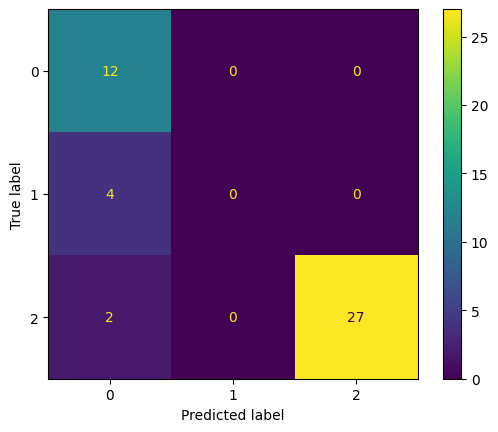

In [130]:
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
plot.plot()
plt.show()

In [160]:
scaled_doc_vectors = [np.average(doc, axis=0) for doc in df["Scaled embeddings"]]

In [161]:
X_scaled = np.array(scaled_doc_vectors)

In [162]:
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_70_30, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 1, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [163]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:28:48,786] A new study created in memory with name: no-name-262dc514-4a6a-4b02-b2cf-bf36537136ce
[I 2023-01-05 15:28:48,798] Trial 0 finished with value: 0.8222222222222222 and parameters: {'n_neighb': 1}. Best is trial 0 with value: 0.8222222222222222.
[I 2023-01-05 15:28:48,811] Trial 1 finished with value: 0.7777777777777778 and parameters: {'n_neighb': 8}. Best is trial 0 with value: 0.8222222222222222.
[I 2023-01-05 15:28:48,824] Trial 2 finished with value: 0.8222222222222222 and parameters: {'n_neighb': 1}. Best is trial 0 with value: 0.8222222222222222.
[I 2023-01-05 15:28:48,835] Trial 3 finished with value: 0.7777777777777778 and parameters: {'n_neighb': 8}. Best is trial 0 with value: 0.8222222222222222.
[I 2023-01-05 15:28:48,846] Trial 4 finished with value: 0.7333333333333333 and parameters: {'n_neighb': 10}. Best is trial 0 with value: 0.8222222222222222.
[I 2023-01-05 15:28:48,858] Trial 5 finished with value: 0.7333333333333333 and parameters: {'n_neig

In [164]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_70_30, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [165]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\optuna\trial\_frozen.py:343: UserWarning: The value 1 of the parameter 'n_neighb' is out of the range of the distribution IntDistribution(high=11, log=False, low=3, step=1).
  warnings.warn(
c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [166]:
trials_dict = {
    "X": "X_scaled_doc_vectors", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_scaled_doc_vectors, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_scaled_doc_vectors, y_70_30
Score: 0.822
Best parameters: {'n_neighb': 1}
F1: 0.858
Recall: 0.822
Precision: 0.898


In [168]:
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_60_40, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 1, 11)
    #weights = trial.suggest_categorical("weights", ["uniform", "distance", None])
    #leaf_size = trial.suggest_int("leaf_size", 1, 100)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [169]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:32:27,001] A new study created in memory with name: no-name-4d0a00d9-52ed-43af-825d-08d4ce100f1c
[I 2023-01-05 15:32:27,013] Trial 0 finished with value: 0.7555555555555555 and parameters: {'n_neighb': 5}. Best is trial 0 with value: 0.7555555555555555.
[I 2023-01-05 15:32:27,023] Trial 1 finished with value: 0.7555555555555555 and parameters: {'n_neighb': 7}. Best is trial 0 with value: 0.7555555555555555.
[I 2023-01-05 15:32:27,032] Trial 2 finished with value: 0.7777777777777778 and parameters: {'n_neighb': 1}. Best is trial 2 with value: 0.7777777777777778.
[I 2023-01-05 15:32:27,041] Trial 3 finished with value: 0.7333333333333333 and parameters: {'n_neighb': 9}. Best is trial 2 with value: 0.7777777777777778.
[I 2023-01-05 15:32:27,050] Trial 4 finished with value: 0.7333333333333333 and parameters: {'n_neighb': 4}. Best is trial 2 with value: 0.7777777777777778.
[I 2023-01-05 15:32:27,060] Trial 5 finished with value: 0.7555555555555555 and parameters: {'n_neigh

In [170]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_60_40, random_state=1)

    n_neighb = trial.suggest_int("n_neighb", 3, 11)

    clf = KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [171]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\optuna\trial\_frozen.py:343: UserWarning: The value 1 of the parameter 'n_neighb' is out of the range of the distribution IntDistribution(high=11, log=False, low=3, step=1).
  warnings.warn(


In [172]:
trials_dict = {
    "X": "X_scaled_doc_vectors", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_scaled_doc_vectors, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_scaled_doc_vectors, y_60_40
Score: 0.778
Best parameters: {'n_neighb': 1}
F1: 0.802
Recall: 0.778
Precision: 0.836


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=pred, labels=clf.classes_)

In [139]:
acc = accuracy_score(pred, y_test)
recall = recall_score(pred, y_test, average="weighted")
precision = precision_score(pred, y_test, average="weighted")
f1 = f1_score(pred, y_test, average="weighted")

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
print(f"Score: {round(acc, 3)}")
print(f"F1: {round(f1, 3)}")
print(f"Recall: {round(recall, 3)}")
print(f"Precision: {round(precision, 3)}")

Score: 0.822
F1: 0.858
Recall: 0.822
Precision: 0.898


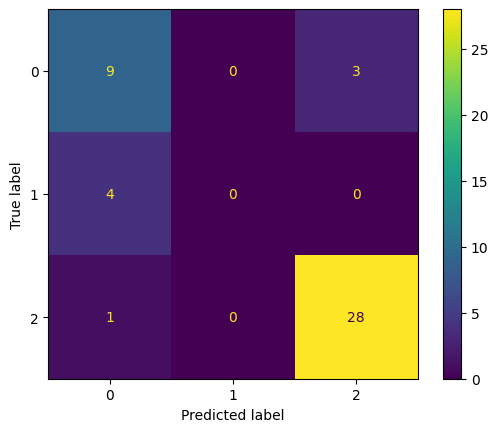

In [141]:
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
plot.plot()
plt.show()